In [7]:
import nibabel as nib
import neuromaps.transforms as transforms

# 输入您的z map文件路径
control_all = '../results/mni152_to_fsaverage/control_all_z_size_level_thresh.nii'


In [10]:
import neuromaps.images as images
controls = images.load_nifti(control_all)

In [15]:
controls.files_types

(('image', '.nii'),)

In [18]:
controls_surf = transforms.mni152_to_fsaverage(control_all, '10k')

controls_surf 

(<nibabel.gifti.gifti.GiftiImage at 0x30a2e7680>,
 <nibabel.gifti.gifti.GiftiImage at 0x16d2b6db0>)

In [40]:
lh_data = controls_surf[0]
lh_data

In [42]:
rh_data = controls_surf[1]
rh_data

In [48]:
output_path = '../results/mni152_to_fsaverage/rh_data_output.gii'
nib.save(rh_data, output_path)

In [60]:
output_path2 = '../results/mni152_to_fsaverage/lh_data_output.gii'
nib.save(lh_data, output_path2)

In [44]:
from nilearn.datasets import load_fsaverage

fsaverage_meshes = load_fsaverage()

In [45]:
import numpy as np

from nilearn.datasets import load_fsaverage_data

curv_sign = load_fsaverage_data(data_type="curvature")
for hemi, data in curv_sign.data.parts.items():
    curv_sign.data.parts[hemi] = np.sign(data)

In [109]:

fsaverage_sulcal = load_fsaverage_data(data_type="sulcal", mesh_type="pial")

/var/folders/yk/78rqxlxn4pz_rsb5_31xvh340000gn/T/ipykernel_46115/92155525.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


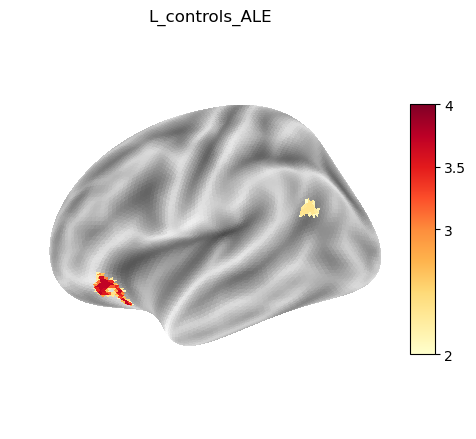

In [116]:
from nilearn.plotting import plot_surf_stat_map

# In this example we will only plot the right hemisphere
hemi = "left"

fig = plot_surf_stat_map(
    stat_map=output_path2,
    surf_mesh=fsaverage_meshes["inflated"],
    hemi=hemi,
    title="L_controls_ALE",
    colorbar=True,
    bg_map=fsaverage_sulcal,
    threshold=1.96,
    cmap='YlOrRd',
    vmin=2,
    vmax=4
)
fig.show()

/var/folders/yk/78rqxlxn4pz_rsb5_31xvh340000gn/T/ipykernel_46115/267401841.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


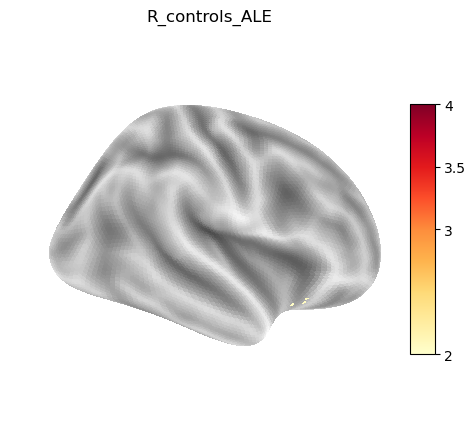

In [110]:
from nilearn.plotting import plot_surf_stat_map

# In this example we will only plot the right hemisphere
hemi = "right"

fig = plot_surf_stat_map(
    stat_map=output_path,
    surf_mesh=fsaverage_meshes["inflated"],
    hemi=hemi,
    title="R_controls_ALE",
    colorbar=True,
    bg_map=fsaverage_sulcal,
    threshold=1.96,
    cmap='YlOrRd',
    vmin=2,
    vmax=4
)
fig.show()


## 利用 surfplot 进行可视化 

In [ ]:
import nilearn.plotting as plotting
import nilearn.image as image
import nilearn

# Data
nifti = nilearn.image.load_img(f"../results/ale/control_all_z_size_level_thresh.nii.gz")


[get_dataset_dir] Dataset found in /Users/ss/nilearn_data/fsaverage

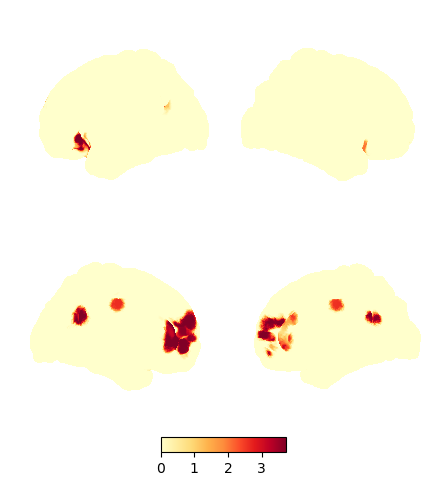

In [155]:
# Plot
fig, axes = plotting.plot_img_on_surf(nifti, surf_mesh="fsaverage",
                                      views=["lateral", "medial"],
                                      hemispheres=["left", "right"],
                                      inflate=False,
                                      colorbar=True,
                                      bg_on_data=False,
                                      cmap="YlOrRd")

In [88]:
import nibabel as nib
import neuromaps.transforms as transforms

# 输入您的z map文件路径
control_all = '../results/mni152_to_fsaverage/control_all_z_size_level_thresh.nii'


In [89]:
import neuromaps.images as images
controls = images.load_nifti(control_all)
controls.files_types
controls_surf = transforms.mni152_to_fslr(control_all, '32k')

controls_surf 


(<nibabel.gifti.gifti.GiftiImage at 0x303fe1be0>,
 <nibabel.gifti.gifti.GiftiImage at 0x31bd38050>)

In [146]:
controls_surf 

tuple

In [145]:
nib.save(controls_surf,'../results/mni152_to_fsaverage/controls_surf_output.gii')

AttributeError: 'tuple' object has no attribute 'to_filename'

In [135]:
lh_data = controls_surf[0]
lh_data
rh_data = controls_surf[1]
rh_data
output_path = '../results/mni152_to_fsaverage/rh_data.gii'
nib.save(rh_data, output_path)
output_path2 = '../results/mni152_to_fsaverage/lh_data.gii'
nib.save(lh_data, output_path2)

In [152]:
import nibabel as nib
import pyvista as pv
from surfplot import Plot

# 加载 .gii 文件
lh_data = nib.load('../results/mni152_to_fsaverage/lh_data.gii')  # 左半脑数据
rh_data = nib.load('../results/mni152_to_fsaverage/rh_data.gii')  # 右半脑数据

In [153]:
from surfplot import Plot
from surfplot.datasets import load_example_data
from neuromaps.datasets import fetch_fslr

surfaces = fetch_fslr()

p = Plot(lh_data, rh_data)

ValueError: Surface be a path-like string, an instance of BSPolyData, or None

## surfplot 教程的代码

/var/folders/yk/78rqxlxn4pz_rsb5_31xvh340000gn/T/ipykernel_46115/3929730740.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


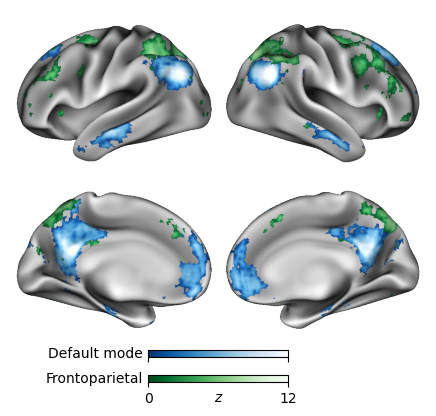

In [95]:
# Code source: Dan Gale
# License: BSD 3 clause

from surfplot import Plot
from surfplot.datasets import load_example_data
from neuromaps.datasets import fetch_fslr

surfaces = fetch_fslr()
lh, rh = surfaces['inflated']

p = Plot(lh, rh)

# shading
lh_sulc, rh_sulc = surfaces['sulc']
p.add_layer({'left': lh_sulc, 'right': rh_sulc}, cmap='binary_r', cbar=False)

color_range = (0, 12)

# add default mode association stats
default = load_example_data(join=True)
p.add_layer(default, cmap='Blues_r', color_range=color_range,
            cbar_label='Default mode')

# add frontoparietal assocation stats
fronto = load_example_data('frontoparietal', join=True)
p.add_layer(fronto, cmap='Greens_r', color_range=color_range,
            cbar_label='Frontoparietal')

# create a clean looking set of colorbars. Only show labels for outer colorbar,
# given that both colorbars have the same range.
cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=0)
fig = p.build(cbar_kws=cbar_kws)
# add units to colorbar
fig.axes[1].set_xlabel('z', labelpad=-11, fontstyle='italic')
fig.show()

In [ ]:
# Install and load required libraries 
# e.g. pip install numpy brainspace surfplot neuromaps nibabel 

from surfplot import Plot
from surfplot.datasets import load_example_data
# Load the surface we want to use as the background
# Read in your own background surface {'.ply', '.vtp', '.vtk', '.fs', '.asc', '.gii'} 
surfaces = read_surface('./path/to/surface/file.gii.gz') 


In [ ]:

# Or use one of the surface files included in the neuromaps package 
# Here we are using the 32k FsLR (a symmetric version 
# fsaverage space template with ~32k verticies in each hemisphere
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']

# Next we want to load the effect we want to plot
# on the background surface. The overlay is an array or surface file the same 
# length (number of vertices) as the background surface.  
# We can either read in a surface file in FsLR space
effect = read_surface('./path/to/surface/atlas/file.gii.gz') 

# Or use one of the surface files in FsLR space included with the surfplot package
effect = load_example_data(dataset = 'default_mode', join=True)

# Generate plot
p = Plot(lh, rh, views=['lateral','medial','anterior', 'dorsal'], zoom=1.2)
p.add_layer(effect, cbar=True, cmap='inferno')
p.build()